**Analyzing MLS Data**

Step 1: Load the Data
You can use the pandas library to load the CSV data into a DataFrame:


In [1]:
import pandas as pd

book='RedFin/redfin_2024-03-03-07-53-09.csv'
# Load the CSV file into a DataFrame
df = pd.read_csv('RedFin/redfin_2024-03-03-07-53-09.csv')


## Step 2: Data Cleaning and Exploration
Check the first few rows of the DataFrame, data types, and missing values:

In [2]:
# Display the first few rows of the DataFrame
print(df.head())

# Check data types and missing values
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Frequency counts for categorical columns
print(df['PROPERTY TYPE'].value_counts())


     SALE TYPE  SOLD DATE              PROPERTY TYPE  \
0  MLS Listing        NaN  Single Family Residential   
1  MLS Listing        NaN                Condo/Co-op   
2  MLS Listing        NaN                Condo/Co-op   
3  MLS Listing        NaN                Condo/Co-op   
4  MLS Listing        NaN    Multi-Family (2-4 Unit)   

                      ADDRESS      CITY STATE OR PROVINCE  ZIP OR POSTAL CODE  \
0              47-11 189th St  Flushing                NY               11358   
1  219-47 75th Ave Unit 294A1   Bayside                NY               11364   
2      198-52 Pompeii Unit 1D    Hollis                NY               11423   
3  2575 Palisade Ave Unit 4KJ     Bronx                NY               10463   
4                   66 Bay St     Bronx                NY               10464   

     PRICE  BEDS  BATHS  ...  STATUS  NEXT OPEN HOUSE START TIME  \
0   898000   3.0    2.5  ...  Active      March-10-2024 12:30 PM   
1   338000   2.0    1.0  ...  Active    

**Step 3: Data Visualization** <br>
Use libraries like Matplotlib and Seaborn for visualization:

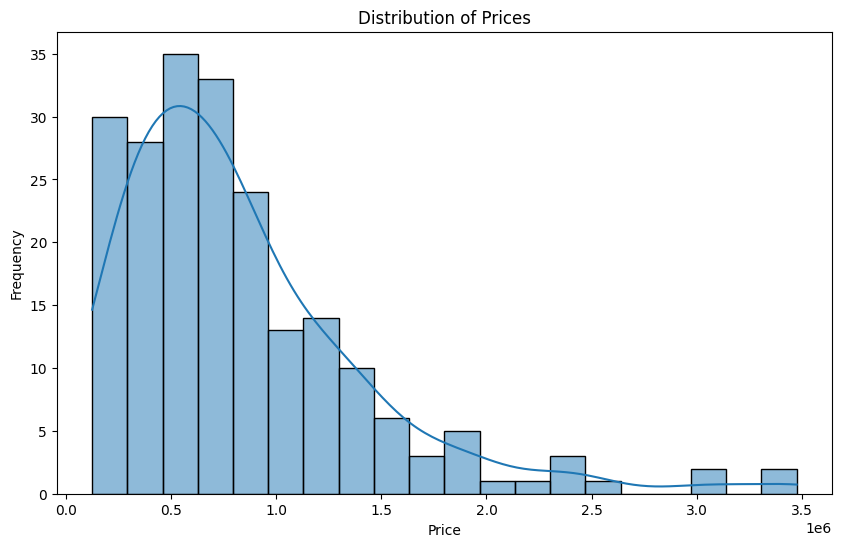

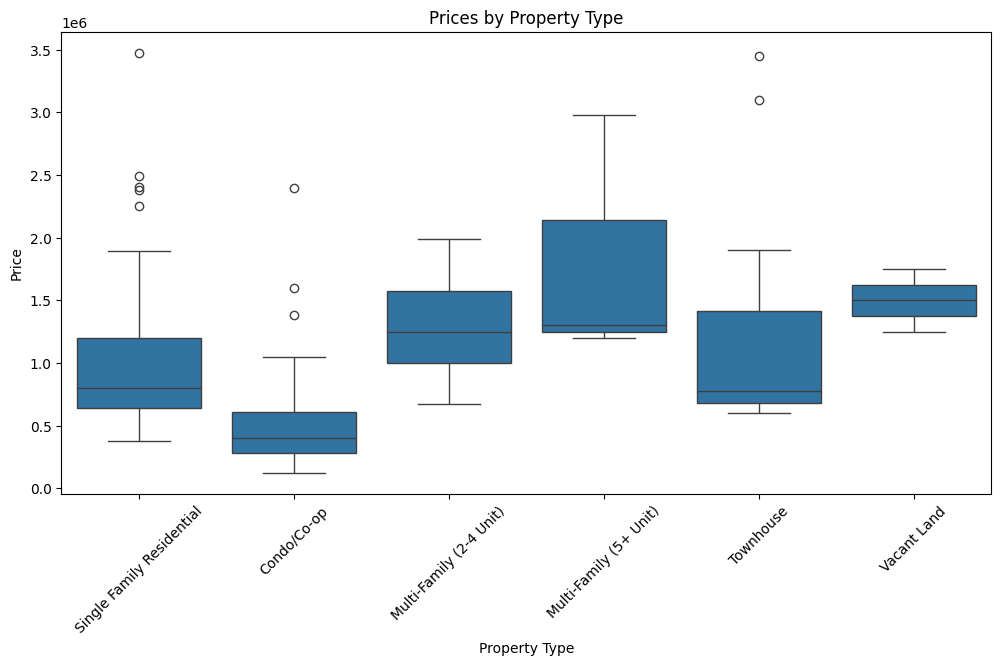

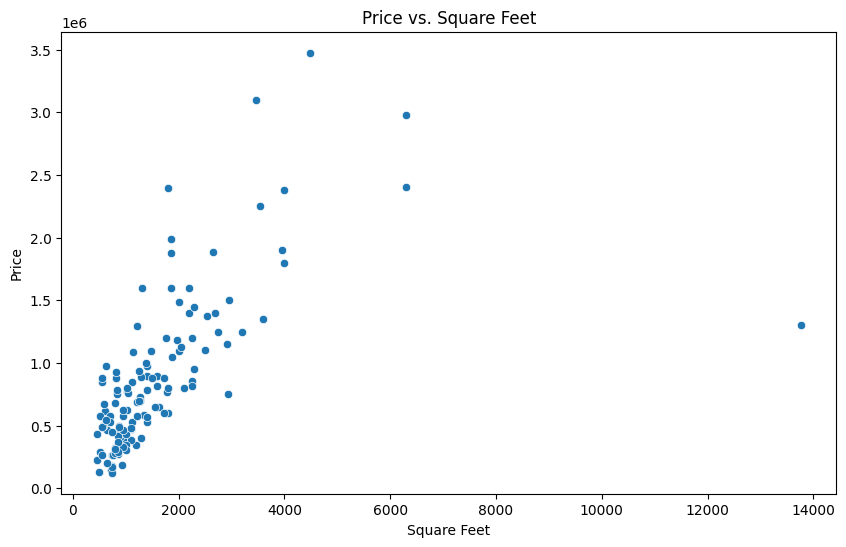

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['PRICE'], bins=20, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

# Boxplot of prices by property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='PROPERTY TYPE', y='PRICE', data=df)
plt.xticks(rotation=45)
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.title('Prices by Property Type')
plt.show()

# Scatter plot of price vs. square feet
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SQUARE FEET', y='PRICE', data=df)
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Price vs. Square Feet')
plt.show()


**Step 4: Advanced Visualization** <br>
For more advanced visualizations, you can explore Seaborn's pairplot, heatmaps, and FacetGrid, or use Plotly for interactive visualizations.

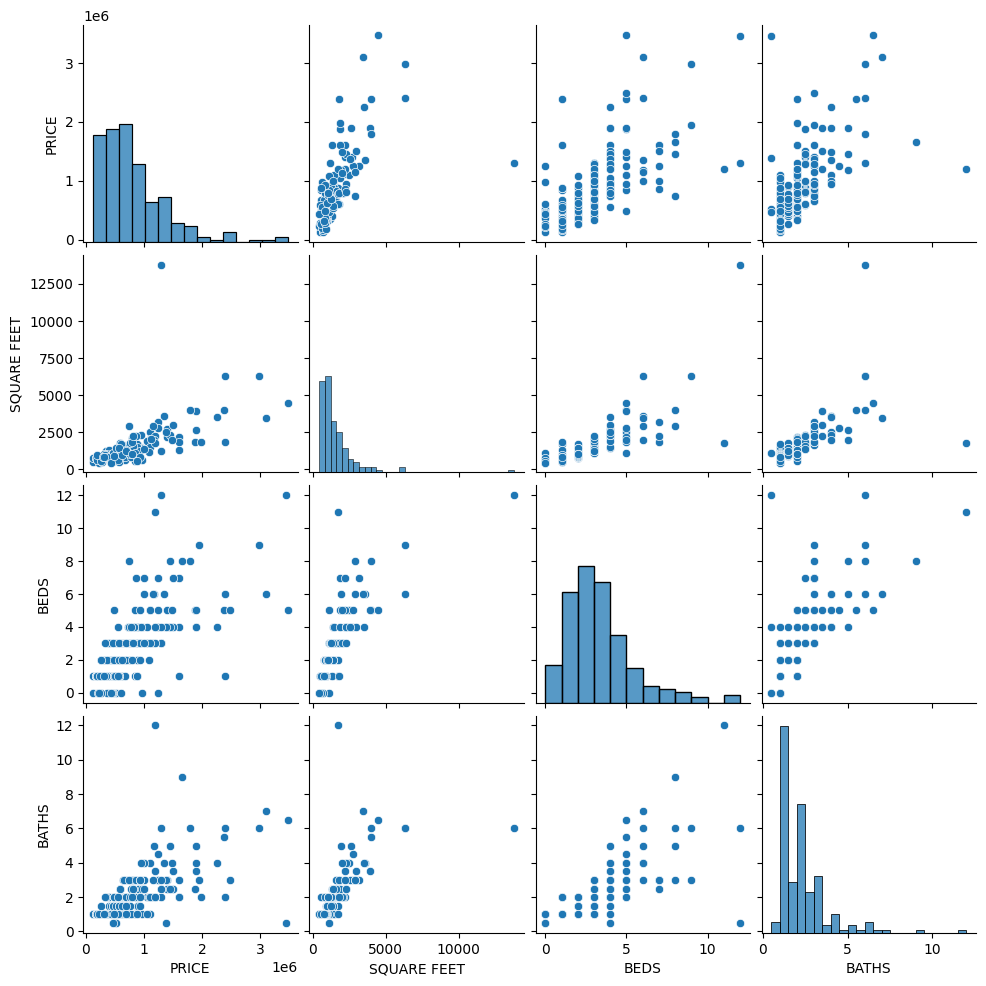

In [4]:
import seaborn as sns

sns.pairplot(df[['PRICE', 'SQUARE FEET', 'BEDS', 'BATHS']])
plt.show()


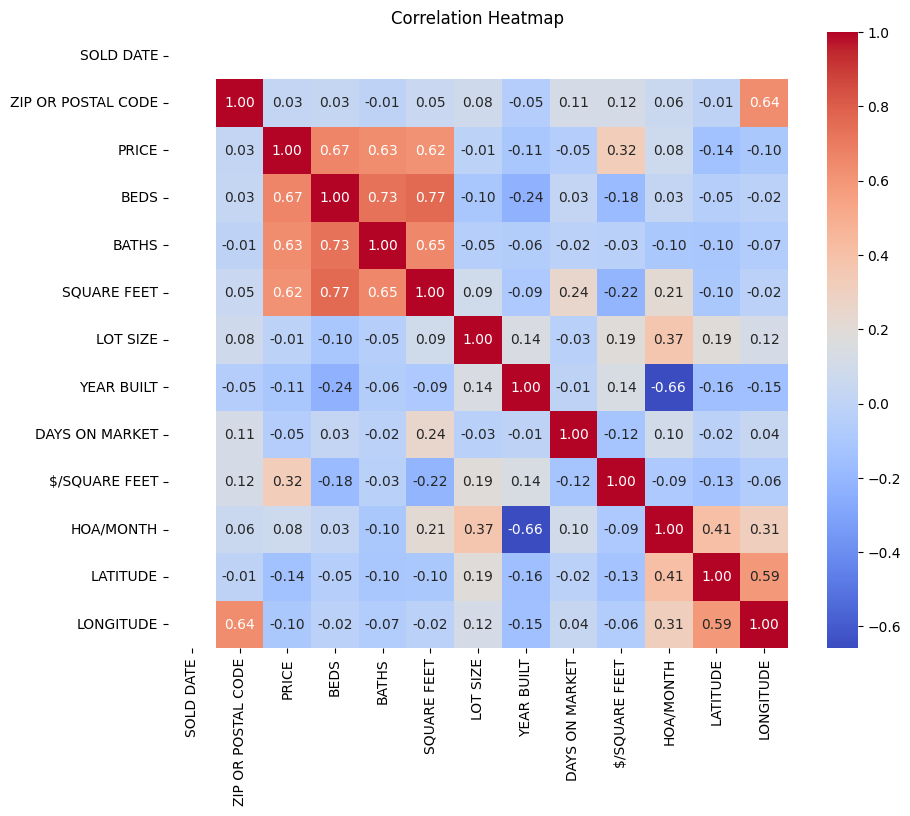

In [11]:
#Heatmap for Correlation:
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



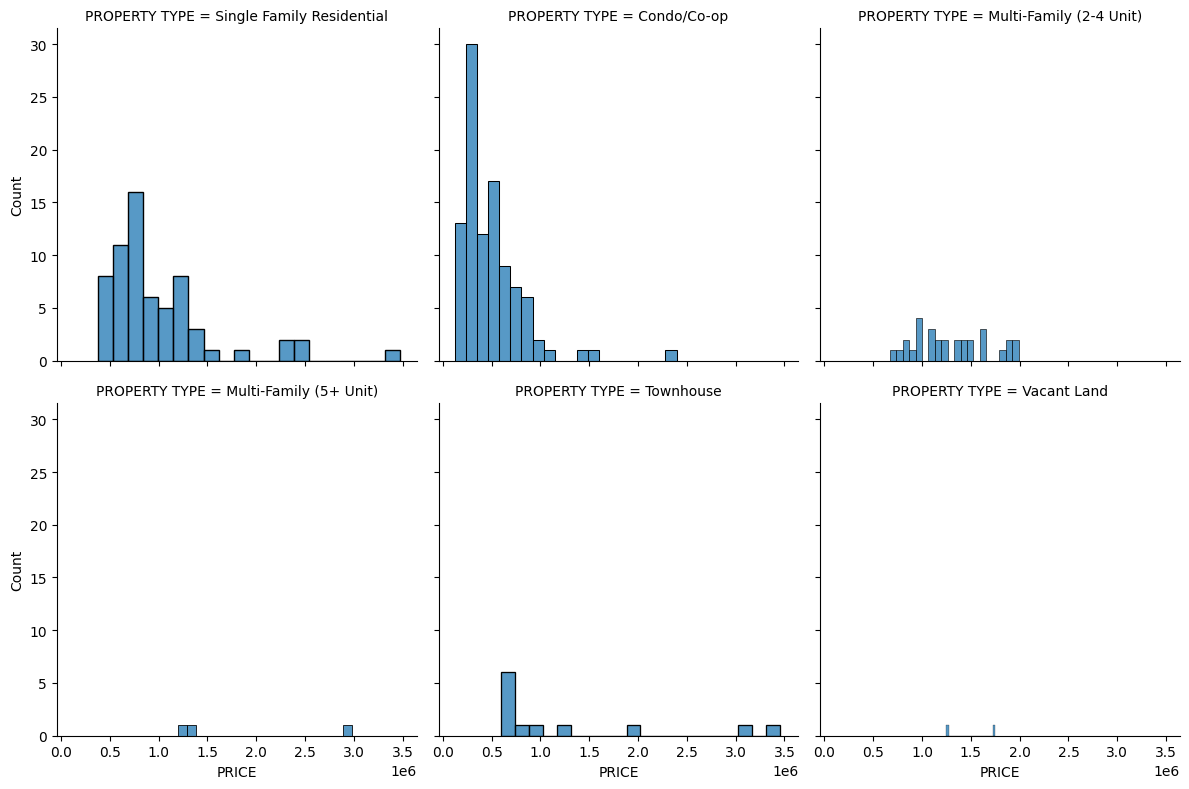

In [5]:
g = sns.FacetGrid(df, col='PROPERTY TYPE', col_wrap=3, height=4)
g.map(sns.histplot, 'PRICE', bins=20)
plt.show()


**Step 5: Further Analysis**
You can perform further analysis based on your insights and questions, such as correlations between variables, trends over time, or geographic patterns.

By following these steps, you can effectively analyze and visualize your real estate data using Python. Feel free to adjust the visualizations and analysis based on your specific requirements and questions.

In [6]:
import folium

# Create a map centered around New York
map_nyc = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add markers for each property
for index, row in df.iterrows():
    folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], 
                  popup=row['ADDRESS']).add_to(map_nyc)

# Display the map
map_nyc


In [16]:
# Find the number of missing values in each column
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

# Decide whether to keep or drop the missing values


Number of missing values in each column:
SALE TYPE                                                                                        0
SOLD DATE                                                                                      211
PROPERTY TYPE                                                                                    0
ADDRESS                                                                                          0
CITY                                                                                             0
STATE OR PROVINCE                                                                                0
ZIP OR POSTAL CODE                                                                               0
PRICE                                                                                            0
BEDS                                                                                             2
BATHS                                                               